<a href="https://colab.research.google.com/github/VONIROUN/Analysis-of-Heart-Disease-Detection-using-Python/blob/main/Analysis_of_Heart_Disease_Detection_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALYSIS OF HEART DISEASE DETECTION USING PYTHON**

---
---

The dataset used comes from the Cleveland Heart Disease Database. The dataset contains 1024 rows and 14 columns.

Data :

https://drive.google.com/file/d/1fgnnh5vL7JzrIoRithPYbEuPq0GUwRdp/view?usp=share_link


# **Install Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Library**

In [ ]:
from sklearn.linear_model import LogisticRegression                                                             
from sklearn.tree import DecisionTreeClassifier                                                                
from sklearn.ensemble import RandomForestClassifier                                                           
from sklearn.svm import SVC                                                                                   
from sklearn.model_selection import train_test_split                                                           
from sklearn.preprocessing import StandardScaler                                                               
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score                               
from sklearn.metrics import classification_report, confusion_matrix                                            
import matplotlib.pyplot as plt                                                                                
import numpy as np                                                                                             
import pandas as pd                                                                                            
import seaborn as sns                                                                                          
import warnings                                                                                                
warnings.filterwarnings("ignore")                                                                              
%matplotlib inline

# **Import Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/heart.csv')

# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is an initial investigative test process that aims to identify patterns, find anomalies, test hypotheses and check assumptions. By doing EDA, users will be greatly assisted in detecting errors from the start, being able to identify outliers, knowing the relationships between data and being able to explore important factors from the data. The EDA process is very useful in the process of statistical analysis.

In [ ]:
#View Data Forms
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#View Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The data consists of 1025 inputs (rows), namely from row number 0 to row number 1024 and 14 variable columns namely age, sex, cp, tresbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal , and targets. All variables are of type integer, except oldpeak which is of type float.

In [ ]:
#View Data Size
data.shape

(1025, 14)

The data analyzed consisted of 1025 rows and 14 columns.

In [ ]:
#View Data Distribution
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


You can see the sum of each column, the average value, standard deviation, minimum value, Q1 value, Q2 value, Q3 value, and the maximum value of each variable.

<Axes: >

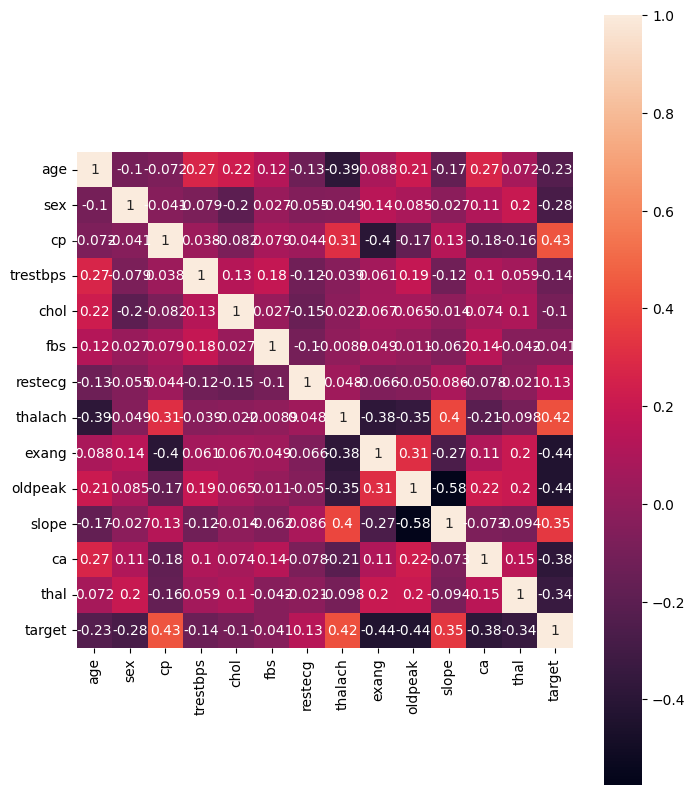

In [ ]:
#Looking at the Correlation Matrix
data.corr()

#Correlation Matrix Plot
fig, ax = plt.subplots()
fig.set_size_inches((8,10))
sns.heatmap(data.corr(), square=True, annot=True)

# **Data Pre-Processing**

Data preprocessing is the process of converting raw data into a form that is easier to understand. Raw data often has errors, missing values, and inconsistencies that lead to a lack of accuracy in the analysis results. Therefore, data preprocessing needs to be done to ensure that the data to be used is clean.

## Data Cleaning

In [ ]:
#Seeing Is There a Missing Value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

It is known that the data does not have a missing value.

Next, we see if there is data duplication.

In [ ]:
#See if there is data duplication
data.duplicated().sum()

723

There are 723 data duplications. Therefore we need to delete the data duplications. This is because duplicate data is very likely to affect the accuracy of the machine learning model.

In [ ]:
#Removing Duplicate Data
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

It can be seen that there are no duplicate data anymore.

## Feature Selection


In selecting features, data separation will be carried out into training sets and test sets of 80: 20, where 80% is for the training set and 20% for the test set.
Train data is used to fit the machine learning model, while test data is used to evaluate the results of the fit model.


In [ ]:
#Split data into training data and testing data
X = data.drop(["target"], axis=1)        
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(241, 13)
(61, 13)


The size of the training dataset is 241
rows and 13 columns, and the size of the testing dataset is 61 rows
and 13 columns.

## Feature Scaling

At this stage we will perform feature scaling using the StandardScaler to classify or propagate range values. StandardScaler removes the mean (centered at 0) and scales to the variance (standard deviation = 1), assuming the data is normally (gaussically) distributed for all features.

In [ ]:
#Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)   
X_test = scaler.transform(X_test)         

# **Data Modeling**


## Logistic Regression

In [ ]:
#Train Models
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
#Predicting Models with Test Sets
lr_pred = lr.predict(X_test)

In [ ]:
#Evaluating Models
print(classification_report(y_test,lr_pred))
print("acuracy:", accuracy_score(y_test, lr_pred))
print("f1:", f1_score(y_test, lr_pred))
print("precision:", precision_score(y_test, lr_pred))
print("recall:", recall_score(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

acuracy: 0.7704918032786885
f1: 0.787878787878788
precision: 0.7027027027027027
recall: 0.896551724137931


With the logistic regression model, the accuracy value is obtained
by 77%, F1 value by 79%, precision value by 70%, and recall value by 90%.

Next, we will look at the confusion matrix for a logistic regression model.

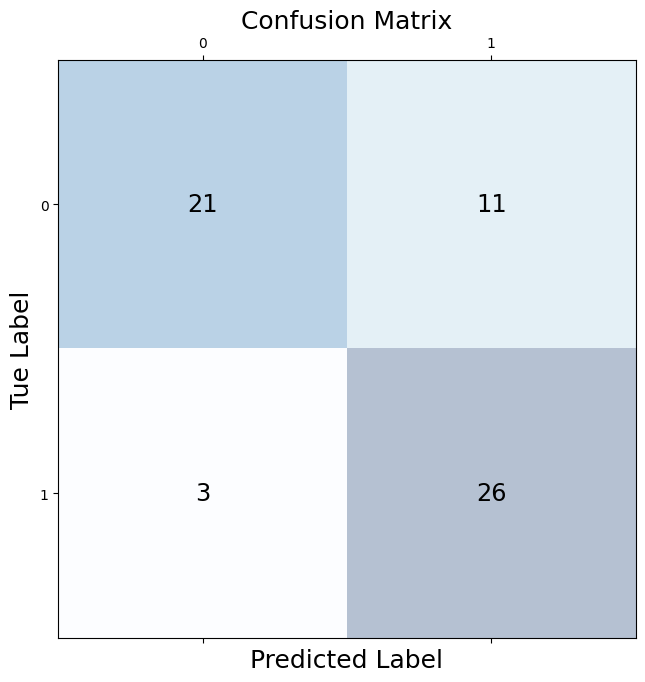

In [ ]:
#Creating a Confusion Matrix for Logistic Regression Models
cm_lr = confusion_matrix(y_test, lr_pred)

#Creating a Confusion Matrix Plot
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm_lr, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        ax.text(x=j, y=i,s=cm_lr[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('Tue Label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Based on the confusion matrix from the logistic regression model above, it is known that there were 21 patients without heart disease who were correctly classified, and 26 patients who had heart disease who were classified correctly.

## Decision Tree

In [ ]:
#Train Models 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Predicting Models with Test Sets
dt_pred = dt.predict(X_test)

In [ ]:
#Evaluate Models
print(classification_report(y_test,dt_pred))
print("acuracy:", accuracy_score(y_test, dt_pred))
print("f1:", f1_score(y_test, dt_pred))
print("precision:", precision_score(y_test, dt_pred))
print("recall:", recall_score(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.69      0.69      0.69        29

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61

acuracy: 0.7049180327868853
f1: 0.6896551724137931
precision: 0.6896551724137931
recall: 0.6896551724137931


Using the decision tree model, an accuracy value of 70% is obtained, an F1 value is 69%, a precision value is 69%, and a recall value is 69%.

Next, we will look at the confusion matrix for the decision tree model.

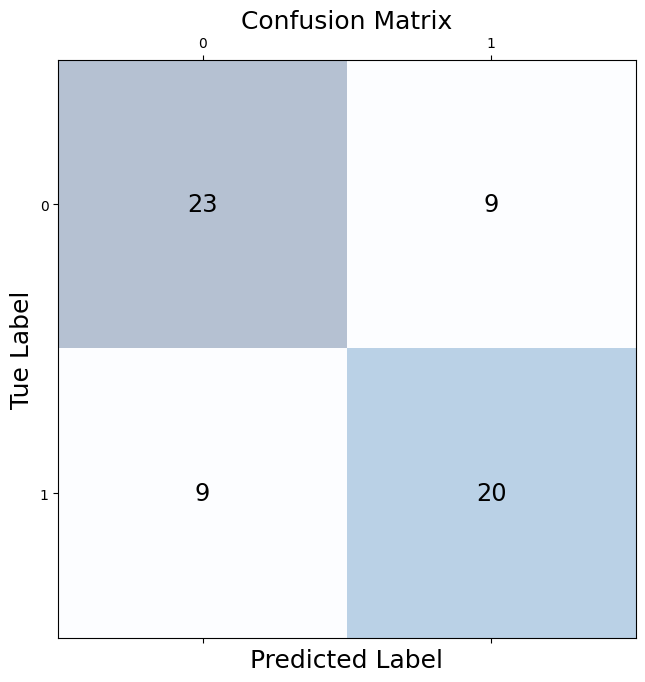

In [ ]:
#Creating a Confusion Matrix for the Decision Tree Model
cm_dt = confusion_matrix(y_test, dt_pred)

#Making Confusion Matrix Plots
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm_dt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax.text(x=j, y=i,s=cm_dt[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('Tue Label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Based on the confusion matrix from the decision tree model above, it is known that there were 23 patients without heart disease who were correctly classified, and 20 patients who had heart disease who were classified correctly.

## Random Forest

In [ ]:
#Train Models
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Predicting Models with Test Sets
rf_pred = rf.predict(X_test)

In [ ]:
#Evaluating Models
print(classification_report(y_test,rf_pred))
print("acuracy:", accuracy_score(y_test, rf_pred))
print("f1:", f1_score(y_test, rf_pred))
print("precision:", precision_score(y_test, rf_pred))
print("recall:", recall_score(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

acuracy: 0.8360655737704918
f1: 0.8387096774193549
precision: 0.7878787878787878
recall: 0.896551724137931


Using the random forest model, an accuracy value of 84% is obtained, an F1 value is 84%, a precision value is 79%, and a recall value is 90%.

Next, we will look at the confusion matrix for the random forest model.

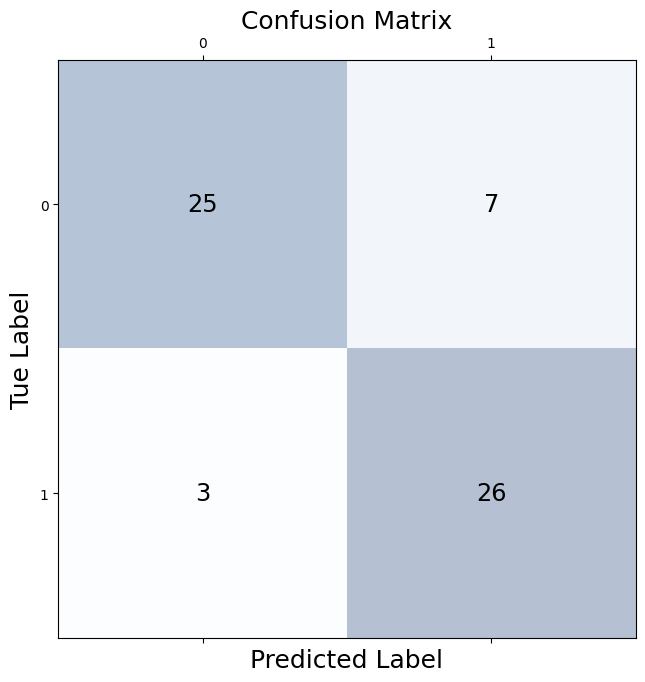

In [ ]:
#Creating a Confusion Matrix for the Random Forest Model
cm_rf = confusion_matrix(y_test, rf_pred)

#Making Confusion Matrix Plots
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm_rf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(x=j, y=i,s=cm_rf[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('Tue Label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Based on the confusion matrix from the random forest model above, it is known that there were 25 patients without heart disease who were correctly classified, and 26 patients who had heart disease who were correctly classified.

## Support Vector Machine (SVM)

In [ ]:
#Train Models
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
#Predicting Models with Test Sets
svm_pred = svm.predict(X_test)

In [ ]:
#Evaluating Models
print(classification_report(y_test,svm_pred))
print("acuracy:", accuracy_score(y_test, svm_pred))
print("f1:", f1_score(y_test, svm_pred))
print("precision:", precision_score(y_test, svm_pred))
print("recall:", recall_score(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

acuracy: 0.7868852459016393
f1: 0.7868852459016394
precision: 0.75
recall: 0.8275862068965517


With the SVM model, the accuracy value is 79%, the F1 value is 79%, the precision value is 75%, and the recall value is 83%.

Next, we will look at the confusion matrix for the SVM model.

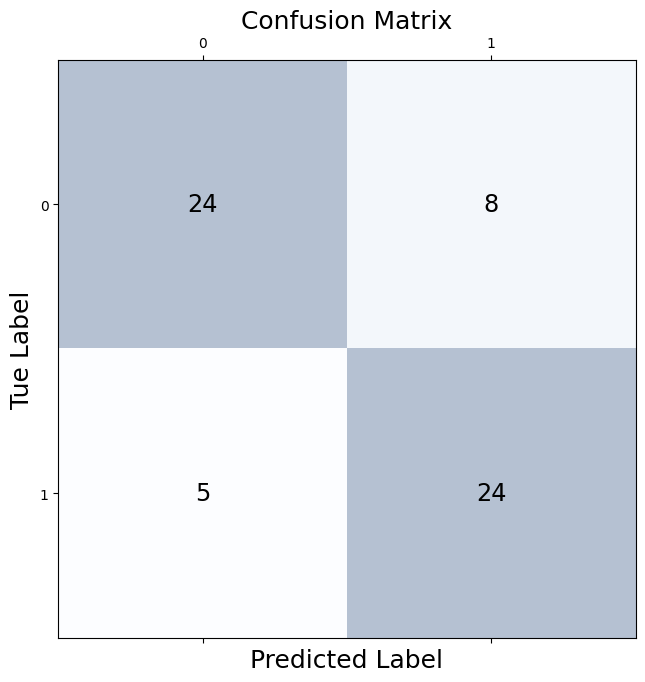

In [ ]:
#Creating a Confusion Matrix for the SVM Model
cm_svm = confusion_matrix(y_test, svm_pred)

#Making Confusion Matrix Plots
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm_svm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax.text(x=j, y=i,s=cm_svm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('Tue Label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Based on the confusion matrix of the SVM model above, it is known that there were 24 patients without heart disease who were correctly classified, and 24 patients who had heart disease who were correctly classified.

# **Best Model Selection**

To choose the best model, we will compare various machine learning models based on accuracy scores, F1 values, precision values, and recall values. The model with the highest accuracy is the best model.

In [ ]:
#Evaluation for Selection of the Best Model
models = [lr,dt,rf,svm]
test_set = pd.DataFrame()
    
for i in models:
        pred = i.predict(X_test)     
        temp = pd.DataFrame(
                {
                    "Accuracy":("%0.2f" % (accuracy_score(y_test,pred))),
                    "F1":("%0.2f" % (f1_score(y_test,pred))),
                    "Precision":("%0.2f" % (precision_score(y_test,pred))),
                    "Recall":("%0.2f" % (recall_score(y_test,pred))),
                }, index=[str(i).split("Classifier")[0].split("(")[0]]
        )
        test_set = pd.concat([test_set,temp])
test_set

,Accuracy,F1,Precision,Recall
LogisticRegression,0.77,0.79,0.70,0.90
DecisionTree,0.70,0.69,0.69,0.69
RandomForest,0.84,0.84,0.79,0.90
SVC,0.79,0.79,0.75,0.83


It is known that based on the accuracy score, F1 value, precision value, and recall value, the random forest algorithm with an accuracy of 84% is the best model for predicting heart disease.

# **Conclusion**

In this study, a heart disease prediction system was introduced with various types of classification techniques such as logistic regression, decision trees, random forests, and a support vector machine (SVM) for heart disease prediction.

By comparing various machine learning models based on accuracy scores, F1 values, precision values, and recall values, it was found that the Random Forest algorithm with an accuracy of 0.84 or 84% is the best algorithm for predicting heart disease.
